
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Load data in dataframe
df1=pd.read_csv('gender_submission.csv')
df=pd.read_csv('train.csv')

In [3]:
#Find the average age of those who survived and those who did not
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

<AxesSubplot:>

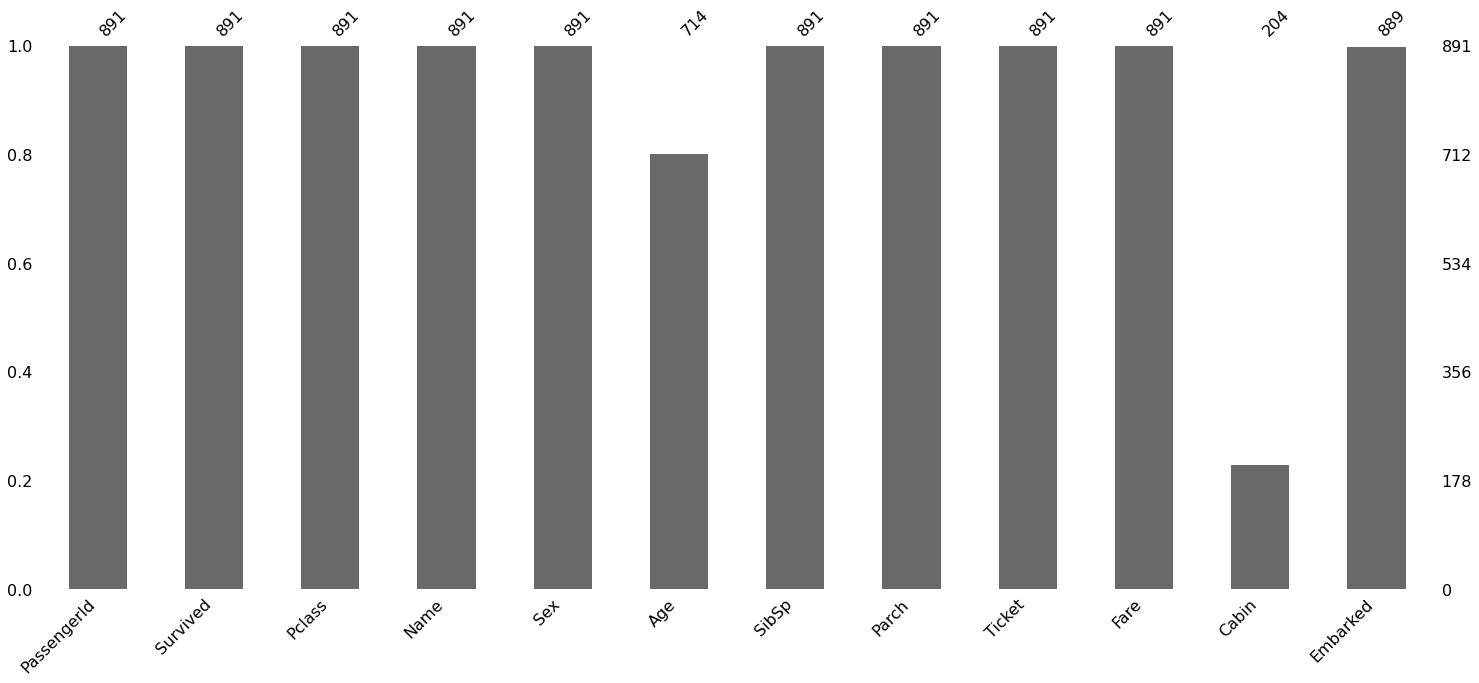

In [4]:
#Your code here 
import missingno as msno
msno.bar(df)

In [5]:
#Your code here 
df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Your code here 
df.dropna(subset=['Embarked'], inplace=True)
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
#Your code here 
df['Cabin'] = df['Cabin'].replace( {'':'¯\(ツ)/¯',  np.NaN:'¯\(ツ)/¯' }, inplace=True)

In [8]:
#Your code here 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,None,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,None,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [9]:
#q1 

df['FamilyCount'] = (df['SibSp'] + df['Parch'])

In [10]:
#q2

df['isReverend'] = 0
df.loc[df['Name'].str.contains('Rev'), 'isReverend'] = 1
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,None,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,None,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,None,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,None,C,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,None,Q,0,0


In [11]:
#q3

dum_embark = pd.get_dummies(df['Embarked'])

#Creating new column names that correspond to the C, Q and S values in the Embarked column
dum_embark.columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']

#calling the new dum_embark df to see if changes worked
dum_embark.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [12]:

sex = pd.get_dummies(df['Sex'])
titanic = pd.concat((df, sex, dum_embark), axis =1)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,female,male,Embarked_C,Embarked_Q,Embarked_S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,None,S,0,1,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,None,S,0,0,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,None,S,3,0,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,None,C,0,0,0,1,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,None,Q,0,0,0,1,0,1,0


In [13]:
#bonus

#titanic['title']=titanic['Name'].str.split(',')[-1].str.split['.'][0]

titanic['title'] = titanic['Name'].str.split(',').map(lambda x: x[-1].split('.')[0])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,isReverend,female,male,Embarked_C,Embarked_Q,Embarked_S,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,1,0,0,1,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,None,C,1,0,1,0,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,0,0,1,0,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,None,S,1,0,1,0,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,0,0,0,1,0,0,1,Mr


In [14]:
#Your code here 

## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [15]:
#1 
np.mean(titanic['Survived'])

0.38245219347581555

In [16]:
#2
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [17]:
#3
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [18]:
#4
titanic.groupby('title')['Survived'].mean()

title
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.696133
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.790323
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

In [19]:
#5
titanic.groupby(titanic['Cabin'] == '¯\(ツ)/¯')['Survived'].mean()

Cabin
False    0.382452
Name: Survived, dtype: float64

In [20]:
#6
titanic.groupby(titanic['Age'].isnull())['Survived'].mean()

Age
False    0.404494
True     0.293785
Name: Survived, dtype: float64

In [35]:
#7 
titanic.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [51]:
#8
titanic['children'] = 0
titanic.loc[titanic['Age'] < 12, 'children'] = 1
titanic[titanic['Age'] > 12].groupby('Pclass').mean()['Survived']

Pclass
1    0.650000
2    0.423077
3    0.211726
Name: Survived, dtype: float64

In [54]:
#9
titanic.loc[titanic['title'].str.contains('Cap')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,isReverend,female,male,Embarked_C,Embarked_Q,Embarked_S,title,children
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,...,S,2,0,0,1,0,0,1,Capt,0


In [69]:
#10: Of all the people that died, who had the most expensive ticket? How much did it cost?
s=titanic[titanic['Survived']==0]
s.sort_values('Fare', ascending=False, inplace=True)
s

/var/folders/l6/sgjk4nkn1l77fkj9zjw0cgcm0000gn/T/ipykernel_49624/325382874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.sort_values('Fare', ascending=False, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,FamilyCount,isReverend,female,male,Embarked_C,Embarked_Q,Embarked_S,title,children
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,...,S,5,0,0,1,0,0,1,Mr,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,...,S,5,0,0,1,0,0,1,Mr,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,...,C,1,0,0,1,1,0,0,Mr,0
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,...,C,0,0,0,1,1,0,0,Mr,0
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,...,S,0,0,0,1,0,0,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,...,S,0,0,0,1,0,0,1,Mr,0
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,...,S,0,0,0,1,0,0,1,Mr,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,...,S,0,0,0,1,0,0,1,Mr,0
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,...,S,0,0,0,1,0,0,1,Mr,0


In [63]:
#10
family =  titanic.groupby( titanic['FamilyCount'])['Survived'].mean()
print(family)

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


In [64]:
#Your code here 
df[df.columns[0:3]].sum() 



Power    201
Speed    210
HP       630
dtype: int64

In [66]:
#Your code here 
df.iloc[:,:3].sum()

Power    201
Speed    210
HP       630
dtype: int64

In [32]:
#Your code here 

In [33]:
#Your code here 